In [1]:
import gym
import gridworld
import numpy as np

In [8]:
actionToMove = {0:'bottom', 1:'top', 2:'left', 3:'right'}

In [2]:
class valueIterationAgent(object):
    """Value iteration agent!"""

    def __init__(self, action_space):
        global env
        
        mdp = env.getMDP() 
        states = list(mdp[0].keys()) # list of states
        nbStates = len(states) # nb of states
        valueFunc = {key: 0 for key in states} # init valueFunction
        policy = {key: 0 for key in states} # init policy
        gamma = 0.9
        seuil = 0.00001

        oldValueFunc = np.array([100 for i in range(nbStates)])

        while (np.linalg.norm(np.array(list(valueFunc.values())) - oldValueFunc) > seuil):

            for state, actions in mdp[1].items():

                oldValueFunc = np.array(list(valueFunc.values()))
                espGain = np.zeros(4)
                #print(actions.values())

                for action, caracts in actions.items():



                    for carac in caracts:

                        espGain[action] += carac[0]*(carac[2] + gamma*valueFunc[carac[1]])
                valueFunc[state] = np.max(espGain)

        for state, actions in mdp[1].items():
                espGain = np.zeros(4)
                for action, caracts in actions.items():
                    for carac in caracts:
                        espGain[action] = carac[0]*(carac[2] + gamma*valueFunc[carac[1]]) 
                policy[state] = np.argmax(espGain)
                
        self.policy = policy

    def act(self, observation, reward, done):
        currentState = gridworld.GridworldEnv.state2str(observation)
        return self.policy[currentState]

In [3]:
class RandomAgent(object):
    """The world's simplest agent!"""

    def __init__(self, action_space):
        self.action_space = action_space

    def act(self, observation, reward, done):
        return self.action_space.sample()

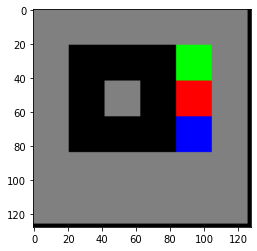

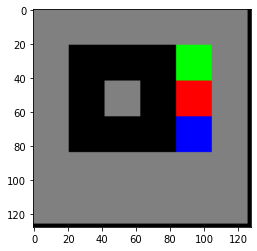

Action choisi : left


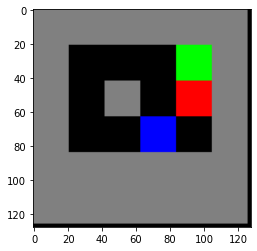

Action choisi : left


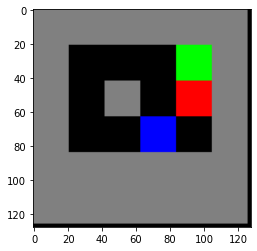

Action choisi : left


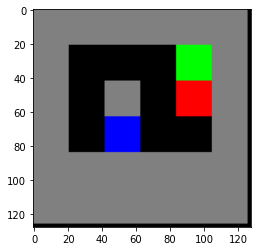

Action choisi : left


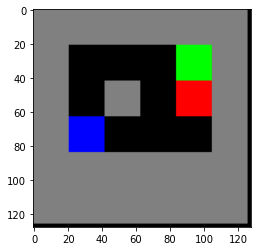

Action choisi : left


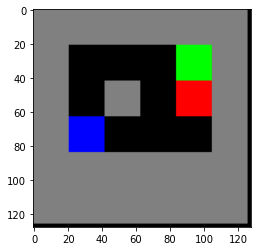

Action choisi : left


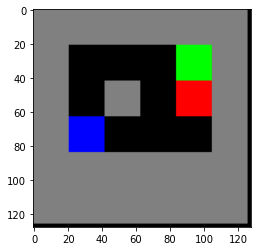

Action choisi : left


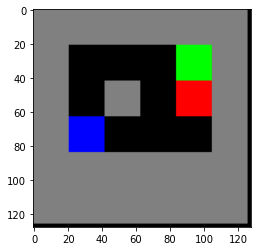

Action choisi : left


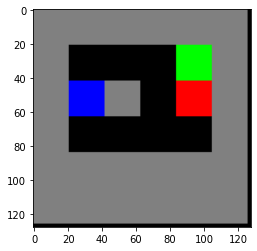

Action choisi : left


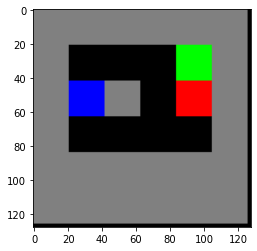

Action choisi : left


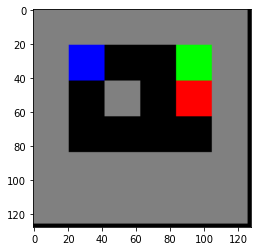

Action choisi : right


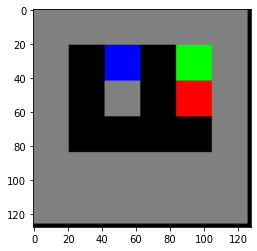

Action choisi : right


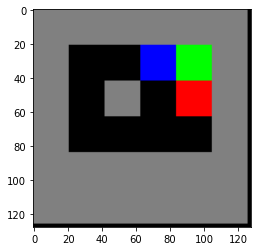

Action choisi : right


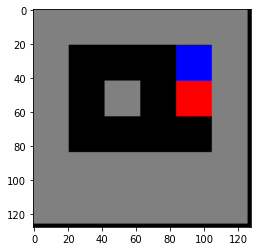

done


In [10]:
env = gym.make("gridworld-v0")
env.setPlan("gridworldPlans/plan0.txt", {0: -0.001, 3: 1, 4: 1, 5: -1, 6: -1})

env.seed(0)  # Initialise le seed du pseudo-random
#print(env.action_space)  # Quelles sont les actions possibles
#print(env.step(1))  # faire action 1 et retourne l'observation, le reward, et un done un booleen (jeu fini ou pas)
useless = env.render()  # permet de visualiser la grille du jeu 
statedic, mdp = env.getMDP()  # recupere le mdp : statedic
#print("Nombre d'etats : ",len(statedic))  # nombre d'etats ,statedic : etat-> numero de l'etat
state, transitions = list(mdp.items())[0]
#print(state)  # un etat du mdp
#print(transitions)  # dictionnaire des transitions pour l'etat :  {action-> [proba,etat,reward,done]}

# Execution avec un Agent
agent = valueIterationAgent(env.action_space)


episode_count = 1
reward = 0
done = False
rsum = 0
FPS = 0.0001
for i in range(episode_count):
    obs = env.reset()
    env.verbose = True  # afficher 1 episode sur 100
    if env.verbose:
        env.render(FPS)
    j = 0
    rsum = 0
    while True:
        action = agent.act(obs, reward, done)
        print("Action choisi :", actionToMove[action])
        obs, reward, done, _ = env.step(action)
        rsum += reward
        j += 1
        if env.verbose:
            useless = env.render(FPS)
        if done:
            #print("Episode : " + str(i) + " rsum=" + str(rsum) + ", " + str(j) + " actions")
            break

print("done")
env.close()